# <span style = "color:Yellow">FUTURE INTERNS INTERNSHIP ASSIGNED TASK - 01 </span>

## <span style = "color: red">Project intro: </span>
With this project, I worked on analyzing the Titanic dataset to explore more about the factors influenced the passanger survival during the disaster. You'll discover different ways of presenting data as well. 
Main steps I followed:

0. Loading the Data
1. Exploratory Data Analysis (EDA).
2. Data Cleaning.
3. Data Visualization.

   Finally, I applied A logistic regration model to predict the survival outcomes.

## Importing the libraries

In [3352]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

## 0. <span style = "color: blue">Loading the datasets.</span>

In [3355]:
# loading the data sets. 
train_data = pd.read_csv("train.csv")

In [3357]:
# view the first five row 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3359]:
#view the last five row of the data set
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3361]:
# dimension of the dataset. 
train_data.shape

(891, 12)

891 rows and 12 Columns

In [3364]:
# Data types of columns
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3366]:
# information of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the dataset info, we have 891 entries( rows), and 12 columns. Our dataframe is showing all Non-null Count for each column. we can find that: Age, Cabin and Embarked have some missing values. 

In [3368]:
# statical info
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##                  1. <span style = "color: blue">Exploratory Data Analysis (EDA)
------------------------

## 1.1.1: Checking for missing Data

 I will need to use seaborn as powerful tool to create heatmap 
 to visulize where the values are missing. 
 As the table below isn't fully give information
 about the missng data.

In [3374]:
# Missing data.
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### 1.1.2: Using Heatmap to visualize Missing data.

<Axes: >

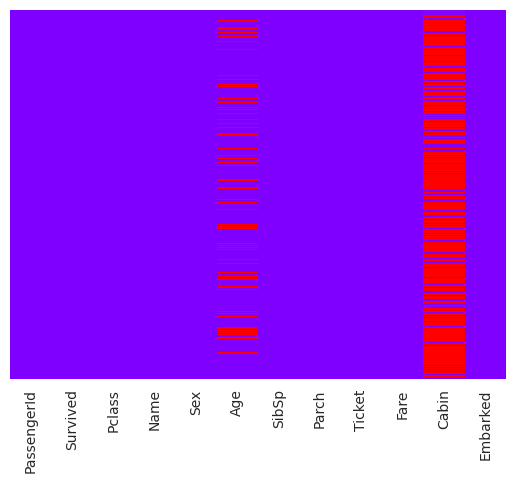

In [3377]:
sns.heatmap(train_data.isna(), yticklabels=False, cbar=False, cmap="rainbow")

From the heatmap, we can visualize that we are missing some of the information on the age serie_ We can fix it. However, on the Cabin column, we are missing a lot of information (we can neglect this column becouse it might not help us as much as we need our later data analysis and while building the prediction model)

## <span style = "color: red">The below is percentage of missing values in quantitative way<span>

In [3381]:
# percentage of null values
(train_data.isna().sum()) / (len(train_data))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## <span style = "color: yellow">Comment:</span>

"Age": We have about 19.86 % of missing values, this is better. we'll go ahead and impute with the mean. 

"Cabin": We have about 77.10% of missing values, this is worse(very high).we will then drop this column. 

"Embarked": We have about 0.22% of missing values, this is nice(it's small). we'll proceed by imputation with the mode ( object dtype)

In [3384]:
train_data.duplicated().sum()

0

There is no duplicated values in dataset.

In [3387]:
data_cleaned = train_data.copy()

In [3389]:
data_cleaned["Age"].mean()

29.69911764705882

In [3391]:
data_cleaned["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [3393]:
# Imputation
data_cleaned["Age"] = data_cleaned["Age"].fillna(data_cleaned["Age"].mean())

In [3395]:
data_cleaned["Embarked"] = data_cleaned["Embarked"].fillna(data_cleaned["Embarked"].mode())

In [3397]:
data_cleaned.shape

(891, 12)

In [3399]:
#Droping
data_cleaned = data_cleaned.drop(columns= ["Cabin"], errors= "ignore")

## 2. <span style = "color: blue">DATA CLEANING.</span>
-------------------------------------

<Axes: ylabel='Age'>

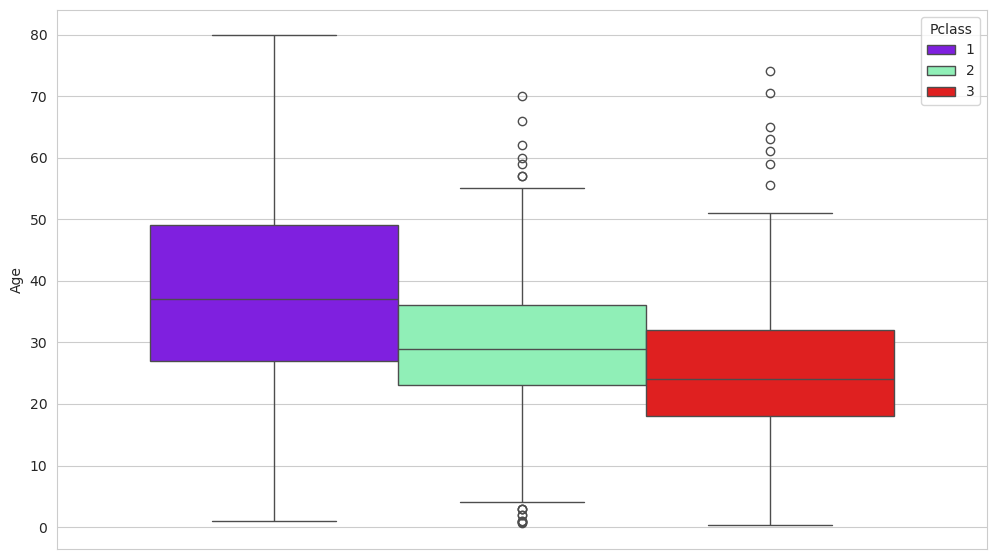

In [3403]:
plt.figure(figsize= (12,7))
sns.boxplot(data= train_data, hue="Pclass", y= "Age", palette= "rainbow")

In [3404]:
def impute_age(cols):
    Age = cols.iloc[0]  # Using iloc for positional indexing
    Pclass = cols.iloc[1]
    if pd.isna(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age

train_data["Age"] = train_data[["Age", "Pclass"]].apply(impute_age, axis=1)

<Axes: >

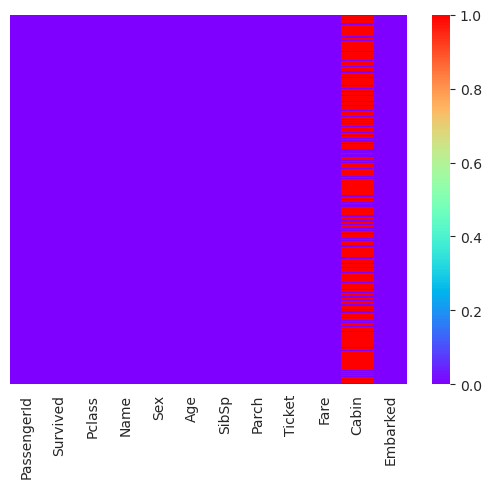

In [3407]:
sns.heatmap(train_data.isna(), yticklabels= False, cmap= "rainbow")

- We visualize that Age missing data have been imputed, 
let's proceed to drop the Cabin column out due to its compactness of missing info.

In [3410]:
#Droping the Cabin columns.
train_data = train_data.drop(columns= ["Cabin"], errors= "ignore")

<Axes: >

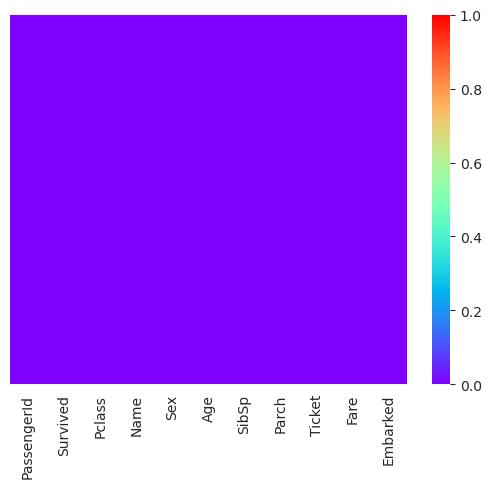

In [3412]:
sns.heatmap(train_data.isna(), yticklabels= False, cmap= "rainbow")

- Now, our Dataset is clean.

In [3415]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## <span style = "color: blue">3. DATA VISUALIZATION </span>

----------------------

<Axes: xlabel='Survived', ylabel='count'>

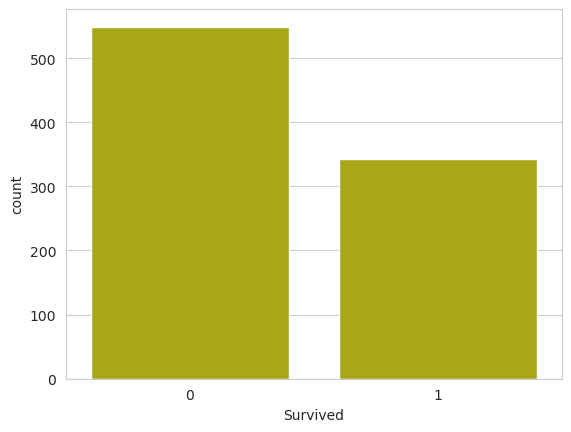

In [3419]:
sns.countplot( data= data_cleaned , x="Survived", color= "y")

0: stand for unsurvived, 1: stands for survived people.
we can visualize that around 550 people died,however, Around 350 people survived the disaster.  

<Axes: xlabel='Survived', ylabel='count'>

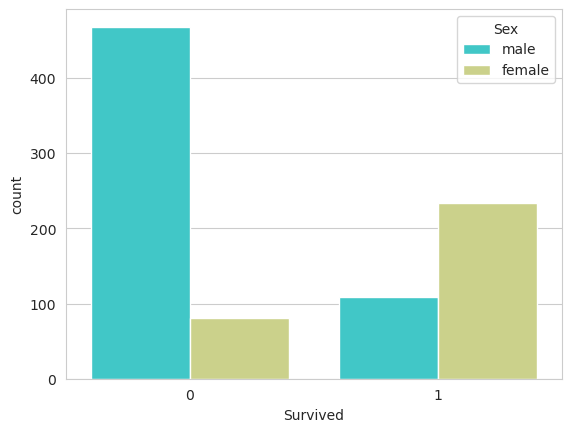

In [3422]:
sns.set_style("whitegrid")
sns.countplot( data= data_cleaned, x="Survived", hue= "Sex", palette= "rainbow")

The Graph above is counting survived people based on the gender, and it's much visualized that more male did not survive than female.(powerful one to help us in analysis.)

as 1 stands for survived people, 0 stands for unsurvived people.

## let's below Visualize people who survived by passenger class

<Axes: xlabel='Survived', ylabel='count'>

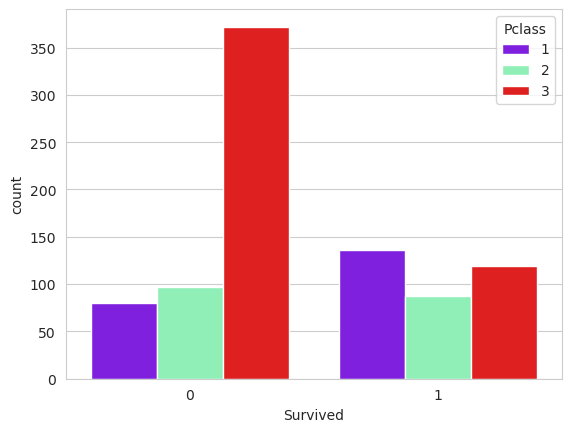

In [3425]:
sns.set_style("whitegrid")
sns.countplot( data= data_cleaned, x="Survived", hue= "Pclass", palette= "rainbow")

## Comment:
We visualize that passengers in the first class survived,followed by lower class, then middle class.however, the lower class passengers died on high percentage, followed by the middle class, then the first class.

## explore in quantitave ways through the four features.

In [3428]:
#visualizing the categorical columns in quantitative ways. 
categ_cols = ["Sex", "Embarked","Pclass","Survived"]
for col in categ_cols:
    print(f"Percentage distribution in {col} column")
    print(data_cleaned[col].value_counts(normalize=True)*100)
    print("\n" + "-"*50 + "\n")

Percentage distribution in Sex column
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

--------------------------------------------------

Percentage distribution in Embarked column
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

--------------------------------------------------

Percentage distribution in Pclass column
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

--------------------------------------------------

Percentage distribution in Survived column
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

--------------------------------------------------



## <span style = "color:yellow"> Comments:</span>
- there were many male than female among the passengers
- there were majority passangers embarked from Southmpton city
- The majority of passanger were in third class, followed by the first class, then second class.
- many people did not survive.

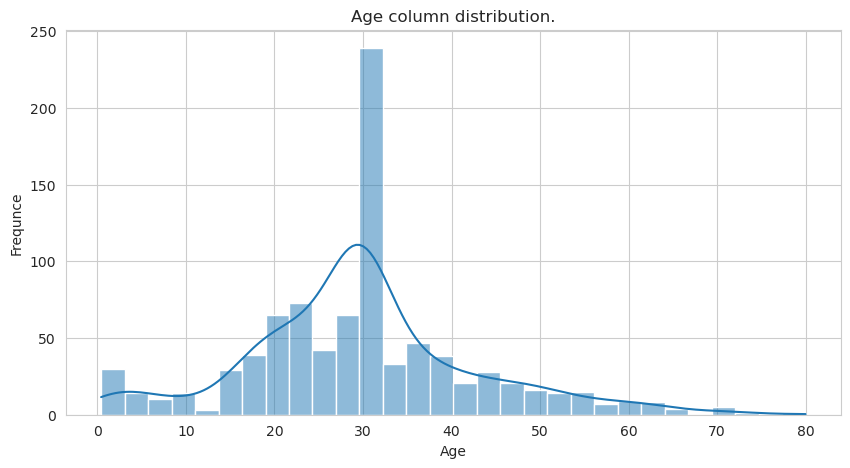

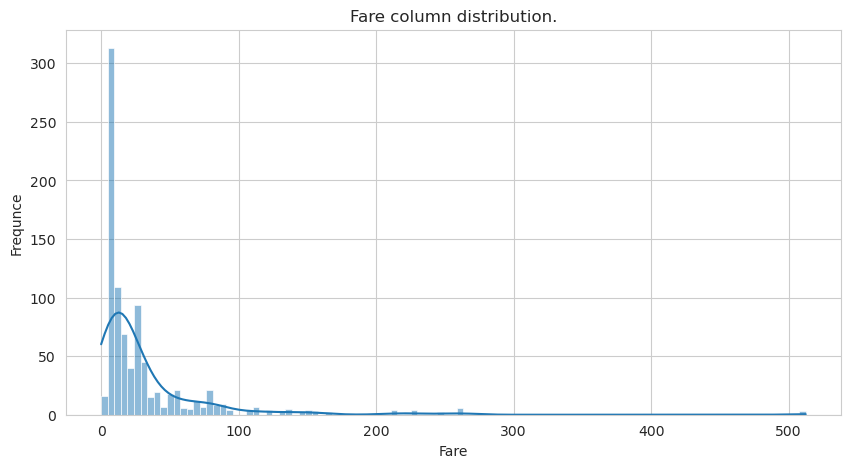

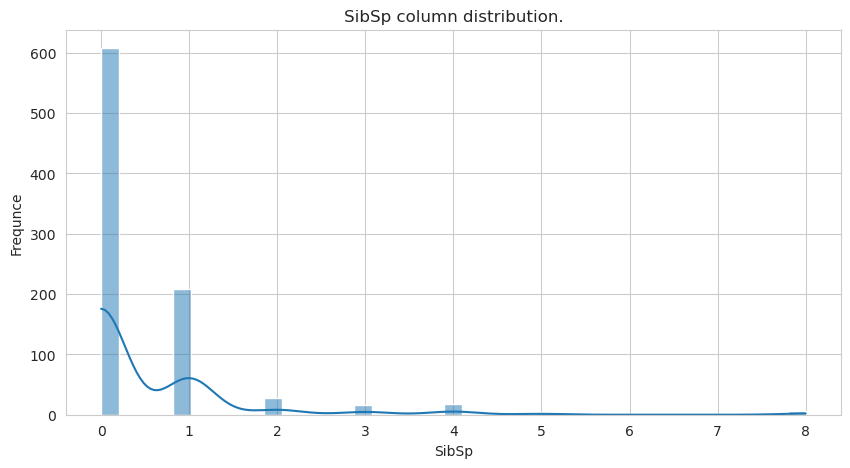

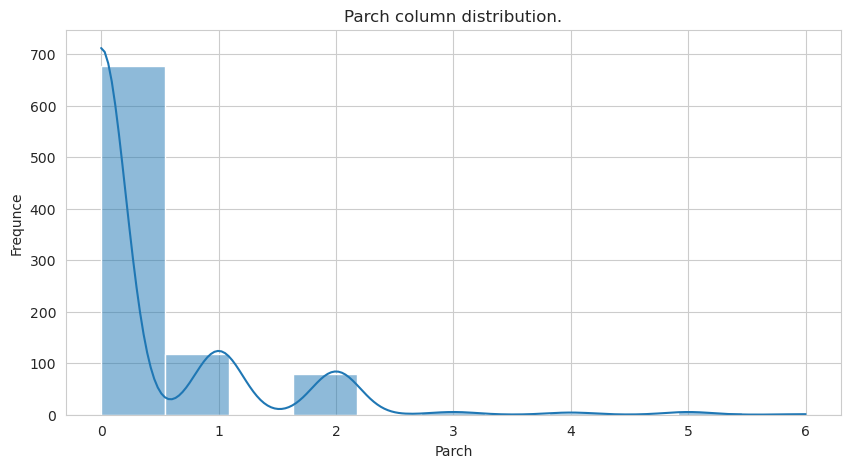

In [3431]:
#visualizing the numerical columns distribution. 
num_cols = ["Age", "Fare", "SibSp", "Parch"]

for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data_cleaned[col], kde=True)
    plt.title("{} column distribution.".format(col))
    plt.xlabel(col)
    plt.ylabel("Frequnce")
    plt.show()

## <span style = "color: yellow">comment:<span>
- Majority of passengers were aged between 18 and 34.and
- Majority of passengers boarded paid less than around 40 pounds for the fare.
- Majority of passengers did not have any siblings,parents or children accompanied them on board.however, some passengers did have one, two,three or four who accompanied them.

In [3433]:
#Visualizing the survival rate by gender in a quantitative way.
data_cleaned.groupby("Sex")["Survived"].value_counts(normalize=True)*100

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: proportion, dtype: float64

- We can find that 74.20% of female survived while only 18.89 male survived. whereas 81.10% of male died while 25.79 died. 

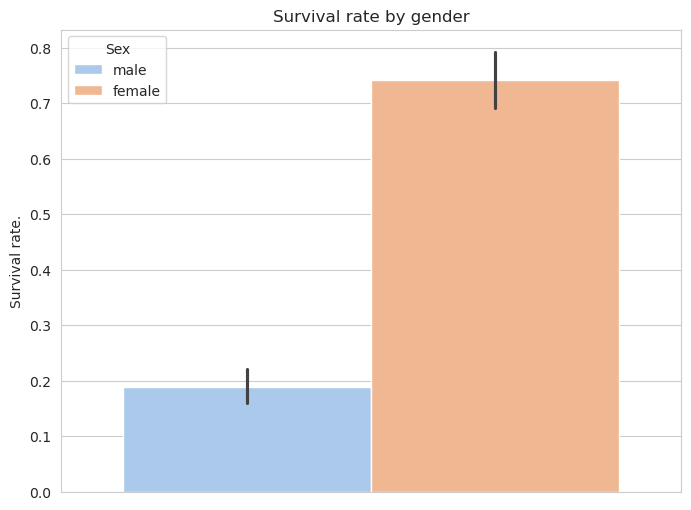

In [3437]:
#Visualizing the survival rate by gender in a qualitative way.
plt.figure(figsize=(8,6))
sns.barplot(data= data_cleaned, hue= "Sex", y="Survived", palette="pastel")
plt.title("Survival rate by gender")
plt.ylabel("Survival rate.")
plt.show()

## Survival rate by passager class

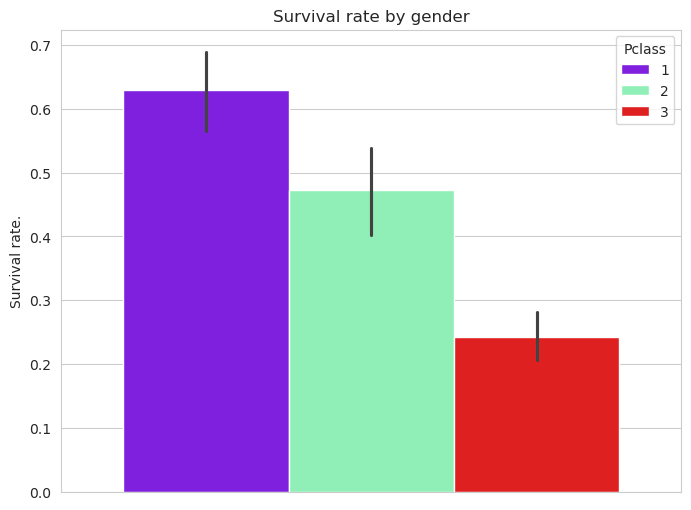

In [3440]:
#Visualizing the survival rate by passanger classes in a qualitative way.
plt.figure(figsize=(8,6))
sns.barplot(hue= "Pclass", y="Survived", data= data_cleaned, palette="rainbow")
plt.title("Survival rate by gender")
plt.ylabel("Survival rate.")
plt.show()

In [3442]:
#Visualizing the survival rate by passenger class in a quantitative way.
data_cleaned.groupby("Pclass")["Survived"].value_counts(normalize=True)*100

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64

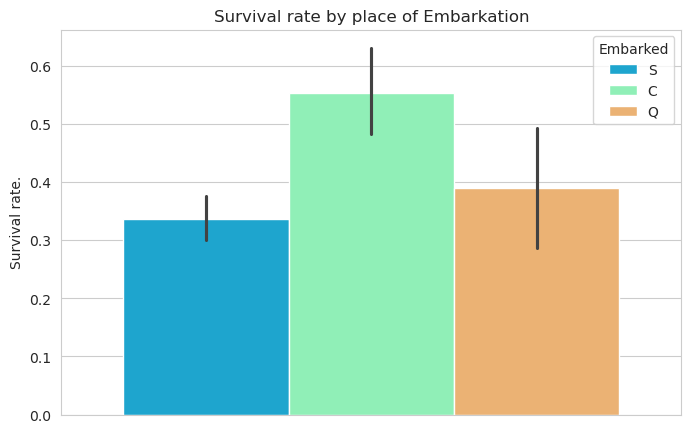

In [3444]:
#Visualizing the survival rate by place of embarkation in a qualitative way.
plt.figure(figsize=(8,5))
sns.barplot(hue= "Embarked", y="Survived", data= data_cleaned, palette="rainbow")
plt.title("Survival rate by place of Embarkation")
plt.ylabel("Survival rate.")
plt.show()

In [3446]:
#Visualizing the survival rate by place of embarkation in a quantitative way.
data_cleaned.groupby("Embarked")["Survived"].value_counts(normalize=True)*100

Embarked  Survived
C         1           55.357143
          0           44.642857
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: proportion, dtype: float64

In [3448]:
train_data.dropna(inplace=True)

We have now droped all null values out which is very neccessary for our model to train the data.

## <span style = "color: red"> Converting the categorical features for our model to be able to train.</span>

In [3452]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


- Now,it's informed that all data have no any missing values.

### - Sex,embarked variables have been changed into binary(dummy)variables for our model performance

In [3456]:
sex = pd.get_dummies(train_data['Sex'],drop_first= True, dtype= float)
embark = pd.get_dummies(train['Embarked'],drop_first= True, dtype= float)

In [3458]:
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [3460]:
train_data.drop(["Sex", "Name", "Embarked", "Ticket"],axis=1, inplace= True)

In [3462]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [3464]:
train_data = pd.concat([train_data, sex, embark], axis=1)

In [3466]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


# <span style = "color: blue"> 4. Logistic Regrassion Model </span>

In [3469]:
X = train_data.drop("Survived",axis=1)

In [3471]:
y = train_data["Survived"]

In [3473]:
X = X.dropna()
y = y[X.index]

In [3475]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [3477]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [3479]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3481]:

logmodel = LogisticRegression(max_iter=2000)  # We increase as needed
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Training and predicting 

In [3484]:
predictions = logmodel.predict(X_test)

## Evaluation

In [3487]:
from sklearn.metrics import classification_report

In [3489]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       163
         1.0       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [3491]:
from sklearn.metrics import confusion_matrix

In [3493]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 33,  71]])

In [3495]:
from sklearn.metrics import accuracy_score

In [2986]:
accuracy_score(y_test, predictions)

0.8239700374531835

### <span style = "color: yellow">Insights:</span>
#### The model performed very well for predictin non-survivors with high predictions likely due to imbalance.
#### The overall accuracy of 82% is fine, but struggled with predicting survivors, showing lower recall for first class. 

# <span style = "color: yellow"> Conclusion: </span>

## The Analysis reveals that survival on the titanic was highly influenced by Gender, class, and Socioeconimic level factors.